In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 


In [32]:
from sklearn.datasets import load_iris

In [33]:
iris = load_iris()

In [34]:
x= pd.DataFrame(iris["data"],columns=["sepal length in cm","sepal width","petal length","petal width"])
y= iris["target"]
x.head(5)

,sepal length in cm,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=30)

In [37]:
## Apply decision tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree1 = DecisionTreeClassifier()
tree1.fit(xtrain,ytrain)

DecisionTreeClassifier()

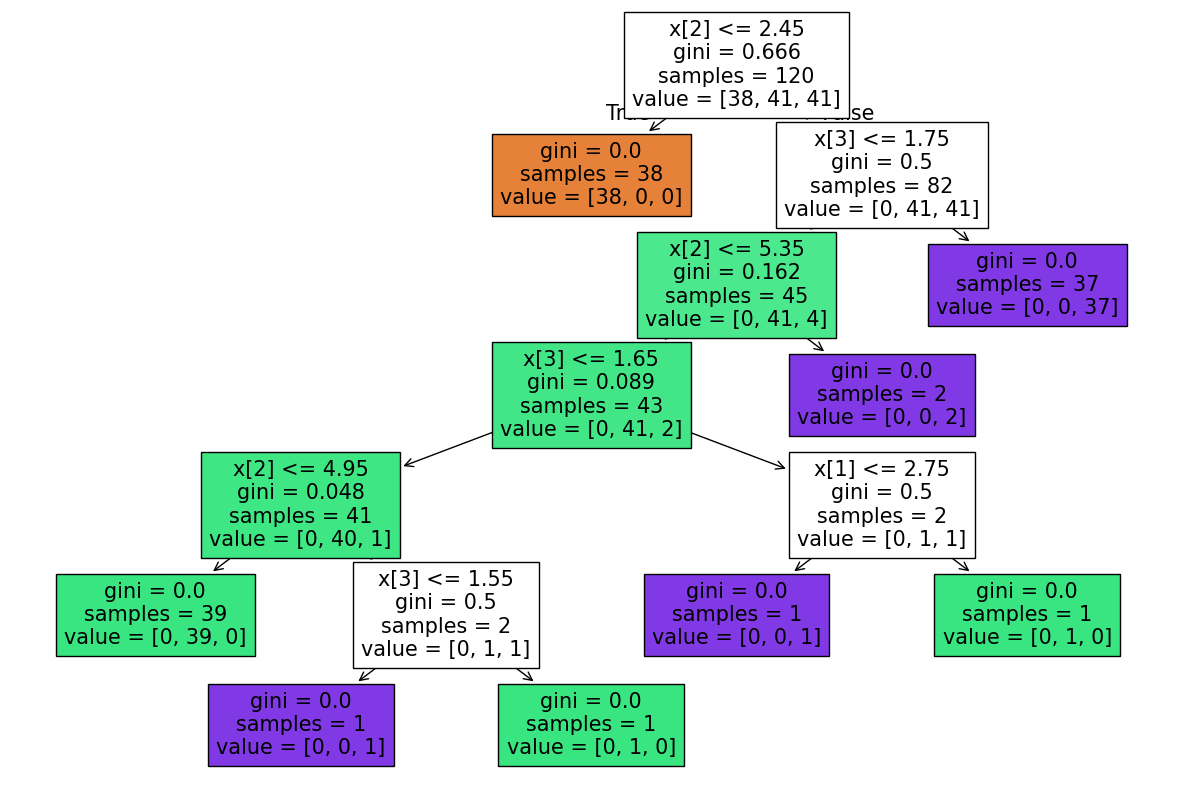

In [40]:
### Visualize the Decision Tree
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(tree1,filled=True)
plt.show()

In [41]:
ypred = tree1.predict(xtest)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

# Always use ytest and ypred

[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


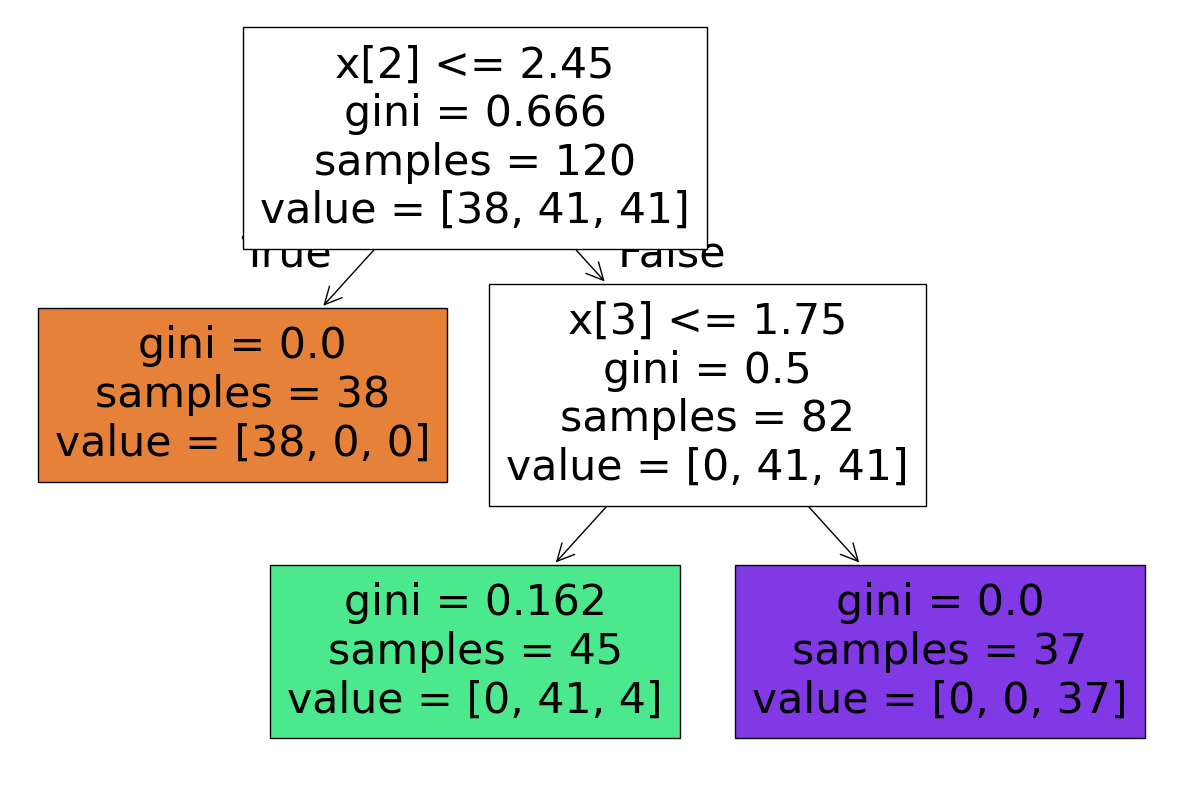

In [42]:
## Post pruning
tree1 = DecisionTreeClassifier(max_depth=2)
tree1.fit(xtrain,ytrain)
### Visualize the Decision Tree
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(tree1,filled=True)
plt.show()

In [43]:
ypred = tree1.predict(xtest)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

# Always use ytest and ypred

[[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

0.9333333333333333


In [ ]:
# Prepruning means hyperparameter tuning

In [44]:
params = {
    "criterion" : ["gini","entropy","log_loss"],
    "splitter" : ["best","random"],
    "max_depth" :[1,2,3,4,5],
    "max_features": ["auto","sqrt","log2"],

}

In [45]:
from sklearn.model_selection import GridSearchCV
tree2 = DecisionTreeClassifier()

In [49]:
import warnings
warnings.filterwarnings("ignore")
grid = GridSearchCV(tree2,param_grid=params,cv=2,scoring="accuracy")
grid.fit(xtrain,ytrain)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [50]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [51]:
grid.best_score_

np.float64(0.9666666666666667)

In [53]:
ypred = grid.predict(xtest)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

# Always use ytest and ypred

[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

0.9333333333333333
